In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
data= pd.read_csv('data.csv')

In [33]:
data

,length,width
0,9.608133,15.392309
1,29.071571,30.221158
2,10.455726,21.578669
3,30.004273,29.920632
4,9.067346,22.520767
...,...,...
9995,10.198020,15.083226
9996,9.985745,10.208445
9997,29.637192,30.291936
9998,15.215549,16.370010


In [32]:
data.columns

Index(['length', 'width'], dtype='object')

In [6]:
data

,length,width
0,9.608133,15.392309
1,29.071571,30.221158
2,10.455726,21.578669
3,30.004273,29.920632
4,9.067346,22.520767
...,...,...
9995,10.198020,15.083226
9996,9.985745,10.208445
9997,29.637192,30.291936
9998,15.215549,16.370010


In [7]:
data.isna().sum()

length    0
width     0
dtype: int64

In [22]:
x=data['length']
y=data['width']

As there are two parameters length and width we will check the same based on these features.

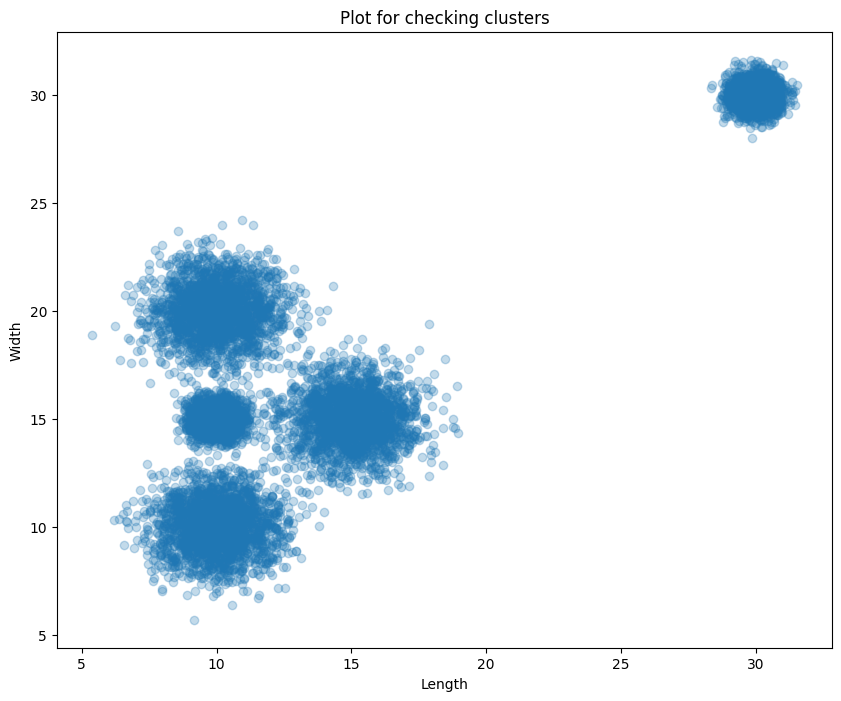

In [28]:
plt.scatter(x, y, alpha=.27)
plt.title("Plot for checking clusters")
plt.xlabel("Length")
plt.ylabel("Width")
rcParams['figure.figsize'] = 7,5

As we can see the scatter plot is showing us clusters from the plot we can see that there are five distinct clusters


# KMeans Intialization for the clusters

In [21]:
kmeans=KMeans(n_clusters=5, random_state=1)

In [30]:
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

Checking labels and the cluster centroids

In [31]:
kmeans.labels_

array([2, 1, 0, ..., 1, 4, 1], dtype=int32)

In [34]:
data['labels']=kmeans.labels_

In [35]:
data

,length,width,labels
0,9.608133,15.392309,2
1,29.071571,30.221158,1
2,10.455726,21.578669,0
3,30.004273,29.920632,1
4,9.067346,22.520767,0
...,...,...,...
9995,10.198020,15.083226,2
9996,9.985745,10.208445,3
9997,29.637192,30.291936,1
9998,15.215549,16.370010,4


Calculate the distance between the points and centroid

In [39]:
def Outlierdet(row, th=4):
  point=np.array(row[:2])
  centroid= kmeans.cluster_centers_[int(row[2])]
  if np.linalg.norm(centroid - point) > th:
        row['outlier'] = 1
  else:
        row['outlier'] = 0
  return row


In [40]:
data=data.apply(Outlierdet, axis=1)

In [43]:
data[data['outlier']==1]

,length,width,labels,outlier
173,6.422112,17.730801,0.0,1.0
606,10.931525,24.233907,0.0,1.0
1883,9.152813,5.695955,3.0,1.0
2417,17.502648,18.198770,4.0,1.0
3355,17.878305,19.405078,4.0,1.0
3614,5.384660,18.901386,0.0,1.0
5471,14.330580,21.154428,0.0,1.0
6534,14.087631,20.072872,0.0,1.0
6633,6.809532,17.587090,0.0,1.0
6651,18.930364,16.512503,4.0,1.0


In [47]:
data=data[['labels','outlier']].astype(int)

In [48]:
data.to_csv("Anomalies.csv")

# Sensitivity Analysis

In [57]:
copy=pd.read_csv('data.csv')

In [60]:
copy.drop(columns=['label', 'outlier'])

,length,width
0,9.608133,15.392309
1,29.071571,30.221158
2,10.455726,21.578669
3,30.004273,29.920632
4,9.067346,22.520767
...,...,...
9995,10.198020,15.083226
9996,9.985745,10.208445
9997,29.637192,30.291936
9998,15.215549,16.370010


Running a few thresholds check

In [62]:
thresholds = np.arange(0.5, 6, 0.5)
defects_proportion = []

for threshold in thresholds:
    copy = copy.apply(Outlierdet, th = threshold, axis=1)
    defects_proportion.append(copy['outlier'].sum()/copy.shape[0])

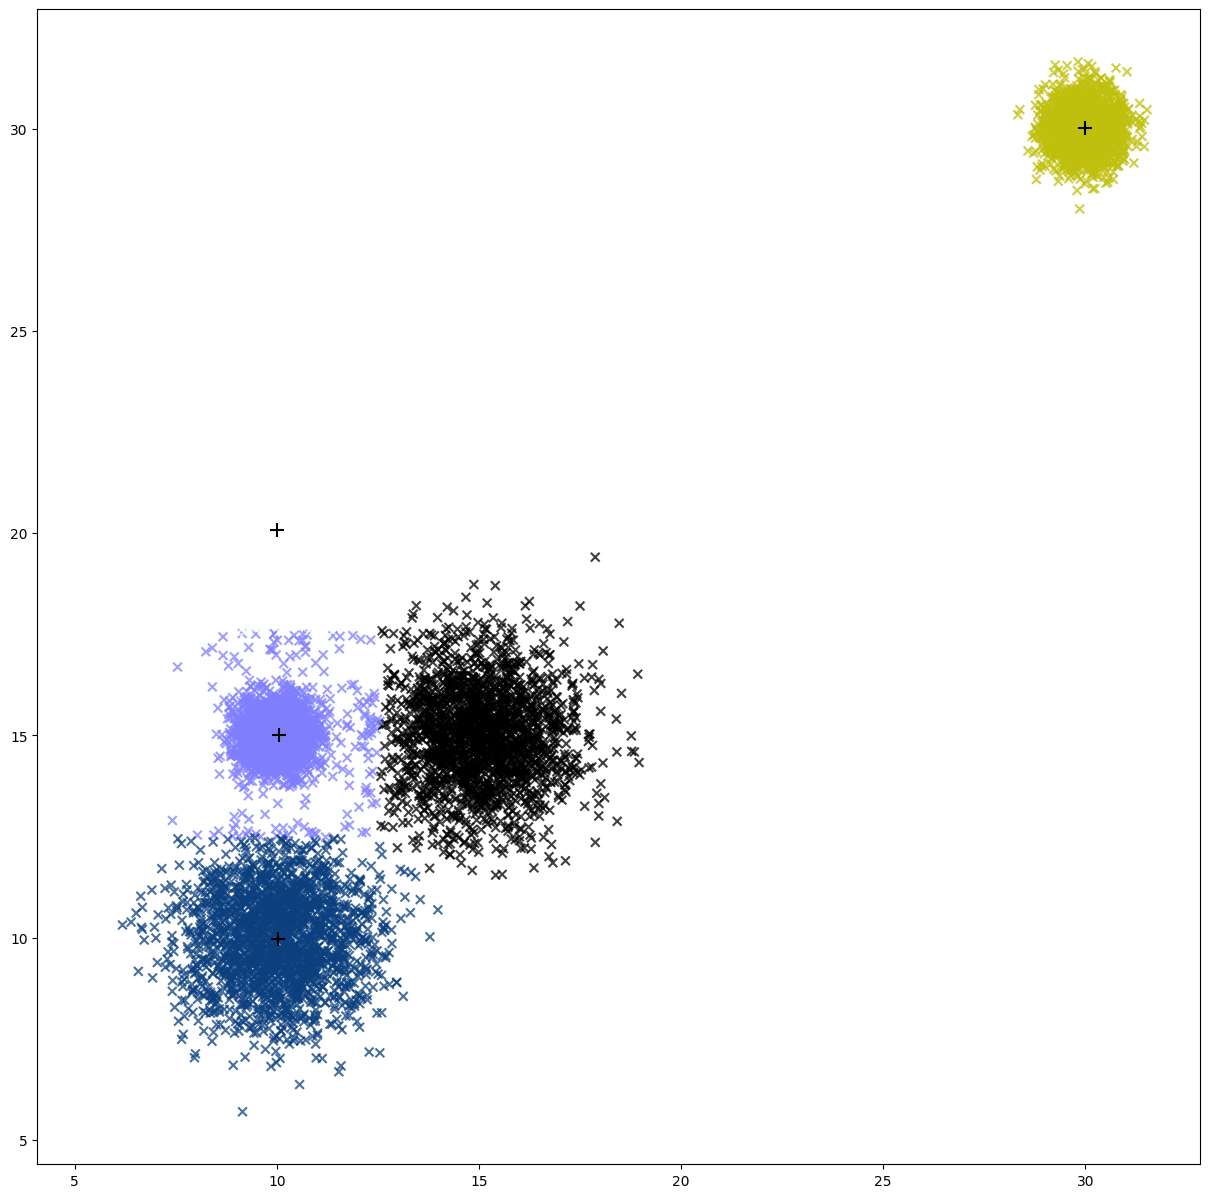

In [67]:
plt.scatter(copy['length'],copy['width'], c=kmeans.labels_, cmap='gist_stern_r', s = 40, marker = 'x',alpha = 0.75);
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker = '+', s = 100)
rcParams['figure.figsize'] = 15,15